#Введение в информационный поиск
## Домашнее задание 1
### Андрей Кашин, CS

Sources: https://github.com/IIoTeP9HuY/Information_Retrieval_Class

In [1]:
%pylab inline
import pandas as pd
import pylab as pl

pd.set_option('display.max_colwidth', 100)

Populating the interactive namespace from numpy and matplotlib


In [2]:
ls stats/

distances       in_out_stats    pagerank        sizes           total_stats     word_frequency


### Распределение размеров документов (исходных .html файлов)

In [3]:
sizes = pd.read_csv('stats/sizes', sep='\t', encoding='utf-8', header=None, names=['size'])
sizes = sizes.convert_objects(convert_numeric=True)
sizes.describe()

,size
count,121761.000000
mean,42966.177873
std,31018.984915
min,13716.000000
25%,27755.000000
50%,34119.000000
75%,45938.000000
max,825061.000000


Min size: 13716
Max size: 825061


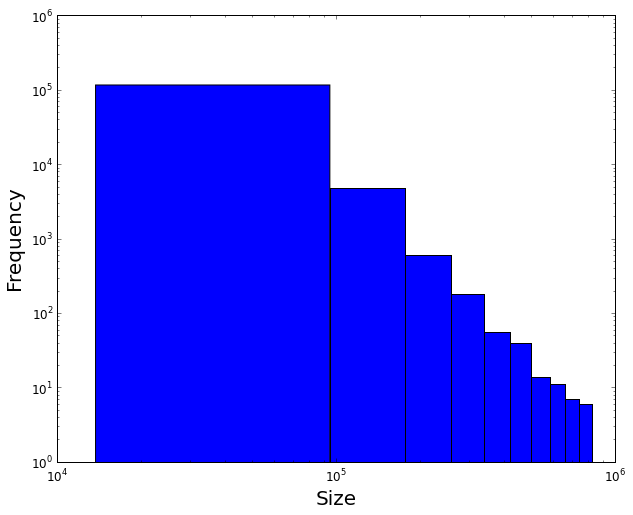

In [4]:
fig = figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Size', fontsize=20)
ax.set_ylabel('Frequency', fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=12)
print("Min size: {}\nMax size: {}".format(sizes['size'].min(), sizes['size'].max()))
h = hist(sizes['size'])

Выводы:
* Размеры файлов от 10 килобайт до 1 мегабайта
* Маленьких файлов сильно больше
* Логарифмы частоты и размера связаны обратно пропорциональной зависимостью

### Распределение in/out степеней вершин ссылочного графа

In [7]:
in_out_stats = pd.read_csv('stats/in_out_stats', sep=' ', encoding='utf-8', header=None, names=['url', 'in', 'out'])
in_out_stats = in_out_stats.convert_objects(convert_numeric=True)
in_out_stats.describe()

,in,out
count,121765.000000,121765.000000
mean,60.378245,60.378245
std,426.784845,136.874867
min,0.000000,0.000000
25%,4.000000,11.000000
50%,10.000000,21.000000
75%,33.000000,46.000000
max,121965.000000,3190.000000


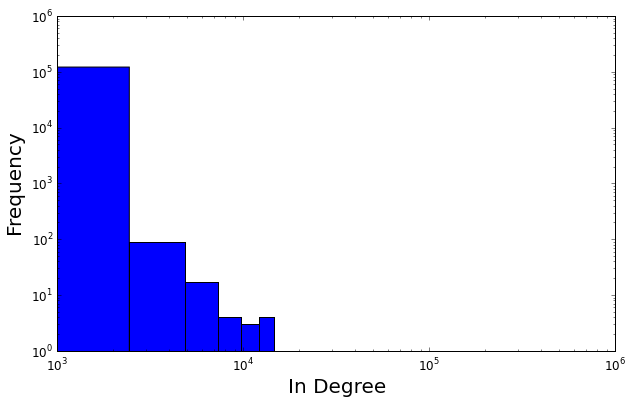

In [8]:
fig = figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('In Degree', fontsize=20)
ax.set_ylabel('Frequency', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xscale('log')
ax.set_yscale('log')
h = hist(in_out_stats['in'], bins=50)

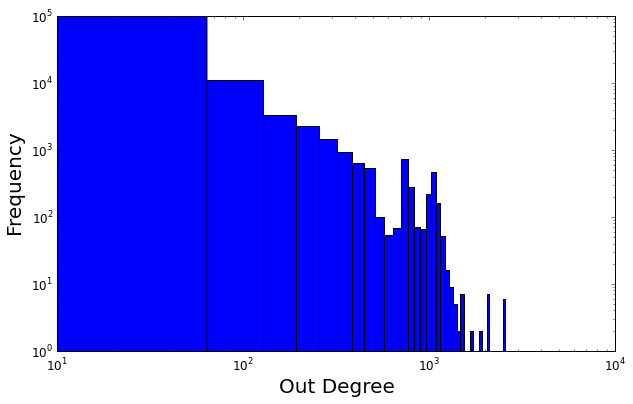

In [9]:
fig = figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Out Degree', fontsize=20)
ax.set_ylabel('Frequency', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xscale('log')
ax.set_yscale('log')
h = hist(in_out_stats['out'], bins=50)

#### Вершины с максимальной входящей степенью

In [10]:
in_out_stats.sort(columns='in', ascending=False).head(20)

,url,in,out
0,http://simple.wikipedia.org/wiki/Main_Page,121965,136
125,http://simple.wikipedia.org/wiki/United_States,33079,606
710,http://simple.wikipedia.org/wiki/France,22101,631
29,http://simple.wikipedia.org/wiki/Multimedia,15627,15
71,http://simple.wikipedia.org/wiki/International_Standard_Book_Number,14246,42
403,http://simple.wikipedia.org/wiki/Germany,14008,511
418,http://simple.wikipedia.org/wiki/United_Kingdom,13185,537
449,http://simple.wikipedia.org/wiki/Japan,12401,334
30,http://simple.wikipedia.org/wiki/Geographic_coordinate_system,11765,16
704,http://simple.wikipedia.org/wiki/Canada,11183,381


#### Вершины с максимальной исходящей степению

In [11]:
in_out_stats.sort(columns='out', ascending=False).head(20)

,url,in,out
118977,http://simple.wikipedia.org/wiki/Deaths_in_2013,3,3190
40877,http://simple.wikipedia.org/wiki/Deaths_in_April_2012,2,2490
72651,http://simple.wikipedia.org/wiki/Deaths_in_January_2012,2,2490
40893,http://simple.wikipedia.org/wiki/Deaths_in_February_2012,2,2490
40882,http://simple.wikipedia.org/wiki/Deaths_in_March_2012,2,2490
40875,http://simple.wikipedia.org/wiki/Deaths_in_2012,21,2490
40672,http://simple.wikipedia.org/wiki/Deaths_in_May_2012,2,2490
36888,http://simple.wikipedia.org/wiki/List_of_Medal_of_Honor_recipients_for_World_War_II,69,2156
9618,http://simple.wikipedia.org/wiki/List_of_Medal_of_Honor_recipients_for_the_Indian_Wars,33,2099
52144,http://simple.wikipedia.org/wiki/2006_in_film,32,2078


Выводы:
* Страница с максимальным количеством входящих ссылок - главная страница. Затем идут страницы с популярными понятиями
* Топ страницы по исходящим ссылкам - это всевозможные списки

### Частоты слов в коллекции

In [12]:
words = pd.read_csv('stats/word_frequency', sep='\t', encoding='utf-8', header=None, names=['word', 'frequency'])
words['frequency'] = words['frequency'].convert_objects(convert_numeric=True)
words.describe()

,frequency
count,903128.000000
mean,65.996252
std,3727.690126
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,1704359.000000


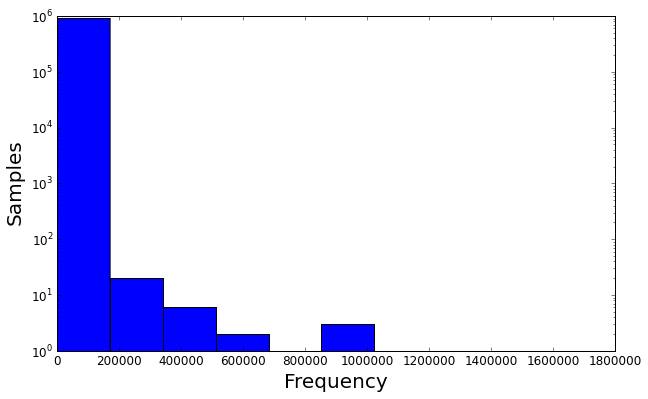

In [13]:
fig = figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Frequency', fontsize=20)
ax.set_ylabel('Samples', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_yscale('log')
h = hist(words['frequency'])

In [14]:
print("Total words: {}\nUnique words: {}".format(words['frequency'].sum(), len(words)))
words.sort(columns='frequency', ascending=False).head(20)

Total words: 59603063
Unique words: 903128


,word,frequency
879446,·,1704359
491208,of,1427422
896691,and,1008013
902036,in,926411
708646,to,925540
521386,change,618058
560543,Wikipedia,579999
899963,page,502363
638608,The,480077
211317,for,471103


Выводы:
* Большая часть слов встречается меньше 10 раз
* При этом, в среднем каждое слово встречается 65 раз
* Самые частые - стоп слова, пунктуация и слова свойственные домену документов (Wikipedia, Simple, Page)

### Pagerank документов

In [15]:
pageranks = pd.read_csv('stats/pagerank', sep=' ', encoding='utf-8', header=None, names=['url', 'pagerank'])
pageranks.describe()

,pagerank
count,121765.000000
mean,0.000008
std,0.000112
min,0.000001
25%,0.000002
50%,0.000002
75%,0.000005
max,0.036821


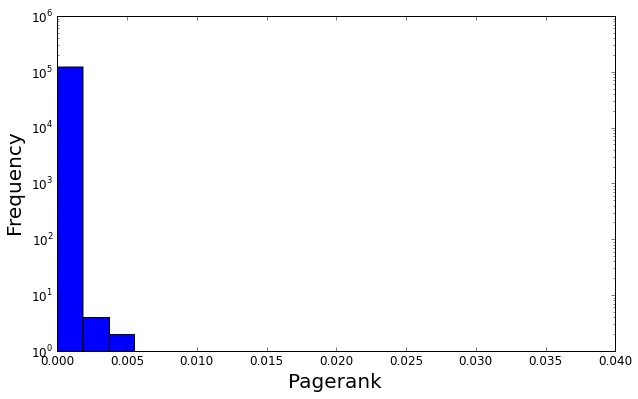

In [16]:
fig = figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Pagerank', fontsize=20)
ax.set_ylabel('Frequency', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_yscale('log')
h = hist(pageranks['pagerank'], bins=20)

In [17]:
pageranks.sort(columns='pagerank', ascending=False).head(20)

,url,pagerank
0,http://simple.wikipedia.org/wiki/Main_Page,0.036821
29,http://simple.wikipedia.org/wiki/Multimedia,0.004687
125,http://simple.wikipedia.org/wiki/United_States,0.004535
710,http://simple.wikipedia.org/wiki/France,0.002611
418,http://simple.wikipedia.org/wiki/United_Kingdom,0.002351
71,http://simple.wikipedia.org/wiki/International_Standard_Book_Number,0.002206
420,http://simple.wikipedia.org/wiki/Definition,0.002060
478,http://simple.wikipedia.org/wiki/Country,0.001809
523,http://simple.wikipedia.org/wiki/English_language,0.001726
449,http://simple.wikipedia.org/wiki/Japan,0.001505


In [24]:
pageranks[pageranks['pagerank'] < 0.001]['pagerank'].sum()

0.92114900526999988

Выводы:
* Множество страниц с высоким pagerank очень сильно пересекается с множеством страниц с высокой входящей степенью
* Большая часть pagerank сосредоточена в "хвосте". Возможно это связано с низким damping фактором равным 0.85